In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


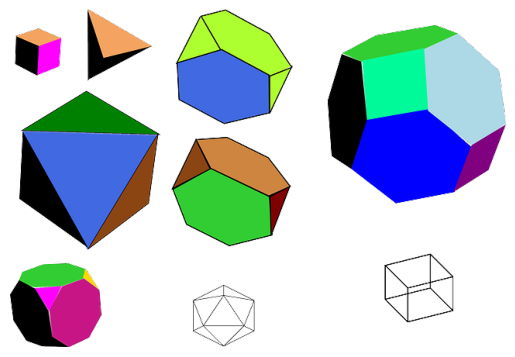

In [ ]:
image_path = '/content/drive/MyDrive/shapes.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

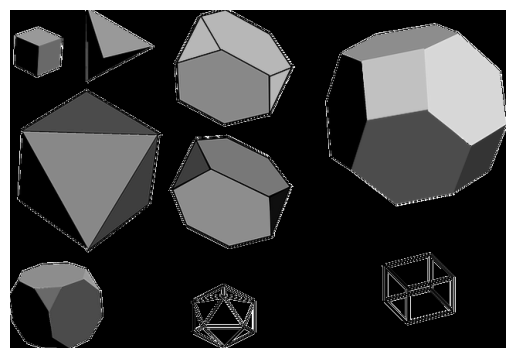

In [ ]:
size_=(image.width+2,image.height+2)
resize_img = image.resize(size_, Image.ANTIALIAS)

img_array = asarray(resize_img)
gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

gray_image.size


plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


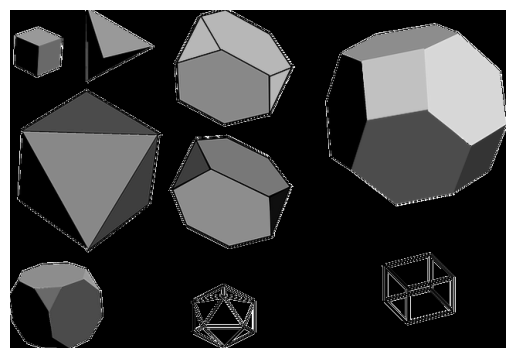

In [ ]:
blurred_image = cv2.GaussianBlur(gray_image, (3,3), 0)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

In [ ]:
threshold_value = 128
thresholded_magnitude = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

threshold_direction = 0.5
thresholded_direction = np.where(np.abs(gradient_direction) > threshold_direction, 255, 0).astype(np.uint8)

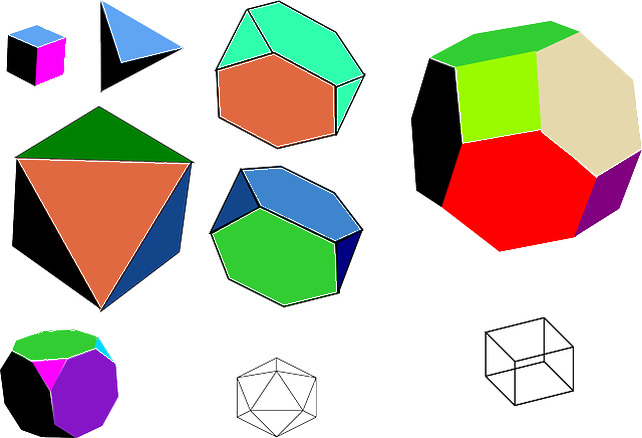

In [ ]:
_, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = img_array.copy()
cv2.drawContours(contour_image, contours, -1,(0,225,0), 1)


cv2_imshow( contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()